<a href="https://colab.research.google.com/github/harikagoriparthi/House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

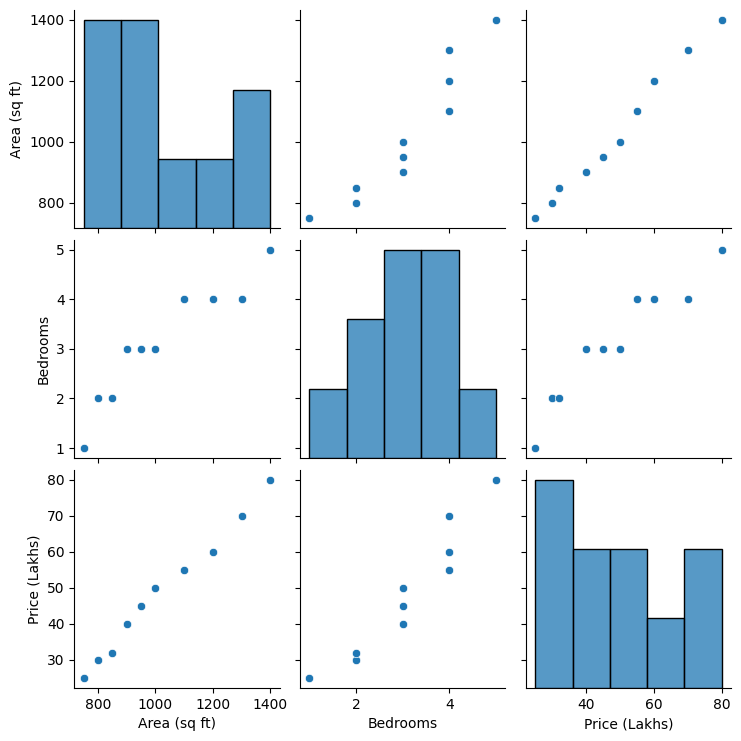

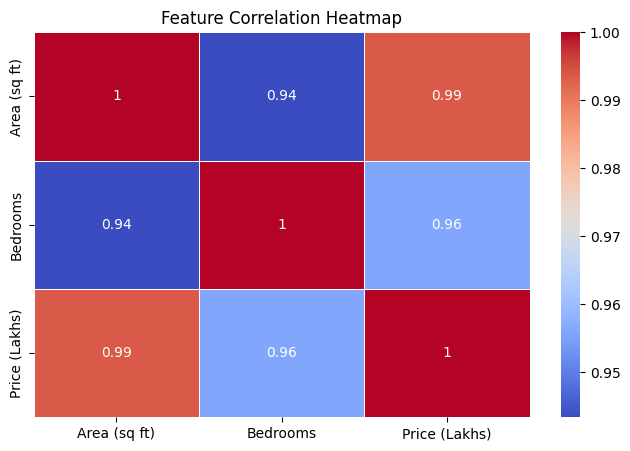

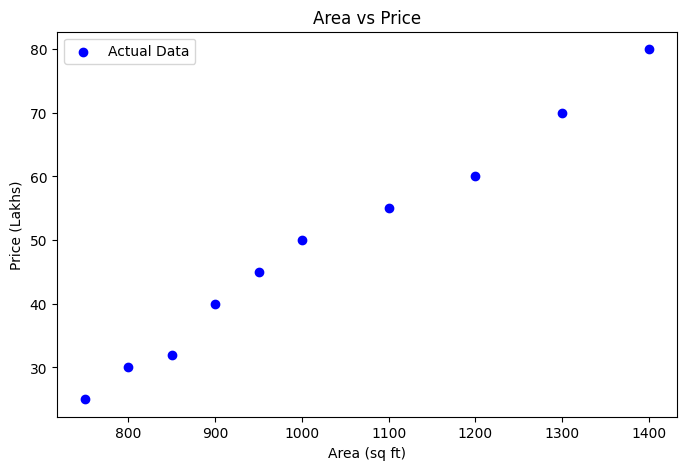


📊 Model Evaluation Metrics:
✅ Mean Absolute Error: 0.71 Lakhs
✅ Mean Squared Error: 0.51 Lakhs
✅ Model Coefficients: [0.06602767 2.78754941]
✅ Model Intercept: -27.60

🏡 Predicted Price for 1200 sq ft, 3BHK: 59.99 Lakhs


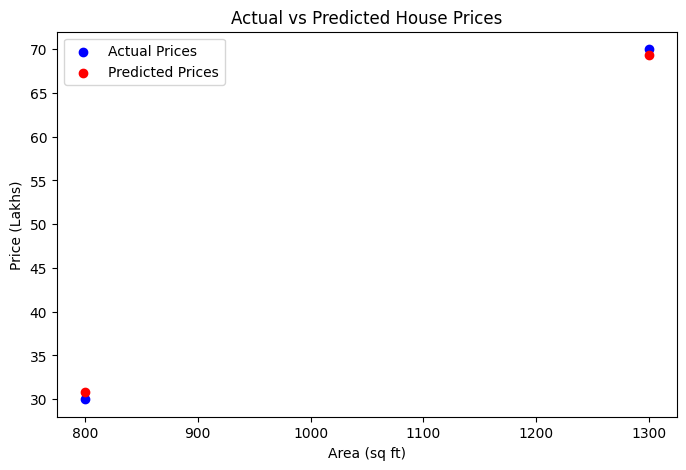

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load Sample Data
data = {
    'Area (sq ft)': [750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400],
    'Bedrooms': [1, 2, 2, 3, 3, 3, 4, 4, 4, 5],
    'Price (Lakhs)': [25, 30, 32, 40, 45, 50, 55, 60, 70, 80]
}
df = pd.DataFrame(data)

# Step 2: Data Visualization
sns.pairplot(df)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['Area (sq ft)'], df['Price (Lakhs)'], color='blue', label="Actual Data")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Lakhs)")
plt.title("Area vs Price")
plt.legend()
plt.show()

# Step 3: Train-Test Split
X = df[['Area (sq ft)', 'Bedrooms']]
y = df['Price (Lakhs)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print("\n📊 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} Lakhs")
print(f"✅ Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f} Lakhs")
print(f"✅ Model Coefficients: {model.coef_}")
print(f"✅ Model Intercept: {model.intercept_:.2f}\n")

# Step 6: Prediction on New Data
new_data = pd.DataFrame([[1200, 3]], columns=['Area (sq ft)', 'Bedrooms'])
predicted_price = model.predict(new_data)[0]
print(f"🏡 Predicted Price for 1200 sq ft, 3BHK: {predicted_price:.2f} Lakhs")

# Step 7: Visualization of Predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_test['Area (sq ft)'], y_test, color='blue', label="Actual Prices")
plt.scatter(X_test['Area (sq ft)'], y_pred, color='red', label="Predicted Prices")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
